# Content Feature Extraction Demo

This notebook fetches HTML from given URLs, extracts DOM-based features using `ContentFeatureExtractor`, and visualizes the results.

In [4]:
import sys
sys.path.append('/mnt/data/utils/data')  # adjust path if needed
from content_feature_extractor import ContentFeatureExtractor
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load URLs from a CSV file (first column contains URLs)
url_data = pd.read_csv('../../raw/raw/combined_dataset.csv')  # Replace 'urls.csv' with your file path
urls = url_data.iloc[:, 0].tolist()  # Extract first column as list

# Show how many URLs were loaded
print(f"Loaded {len(urls)} URLs from CSV file")

Loaded 1600 URLs from CSV file


In [6]:
# Initialize extractor and fetch+extract features
extractor = ContentFeatureExtractor()
features = extractor.transform(urls)
columns = [
    'num_links',
    'num_external_links',
    'num_forms',
    'num_inputs',
    'num_hidden_inputs',
    'num_password_inputs',
    'ratio_password_inputs',
    'num_scripts',
    'num_external_scripts',
    'num_iframes',
    'num_non_sandbox_iframes',
    'num_images',
    'num_event_handlers',
    'num_onclick_attrs',
    'num_onmouseover_attrs',
    'num_meta_refresh',
    'suspicious_word_count'
]
df = pd.DataFrame(features, columns=columns)
df.index = urls
df

,num_links,num_external_links,num_forms,num_inputs,num_hidden_inputs,num_password_inputs,ratio_password_inputs,num_scripts,num_external_scripts,num_iframes,num_non_sandbox_iframes,num_images,num_event_handlers,num_onclick_attrs,num_onmouseover_attrs,num_meta_refresh,suspicious_word_count
https://sandiafcuarea.weebly.com/,4.0,1.0,1.0,8.0,5.0,0.0,0.000000,26.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,22.0
https://relais-mondial-relay.info/,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://att-106384-100733.weeblysite.com/,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,15.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
https://redigbosthknk.web.app,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
https://flowcv.me/jhshshhgs,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://powerfulpsychics.com,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://4shared.com,118.0,96.0,5.0,28.0,19.0,2.0,0.071429,57.0,38.0,0.0,0.0,1.0,20.0,20.0,0.0,0.0,22.0
https://pancia-piatta.it,75.0,20.0,2.0,14.0,1.0,0.0,0.000000,14.0,3.0,1.0,1.0,31.0,0.0,0.0,0.0,0.0,2.0
https://tech-ibm.bond,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


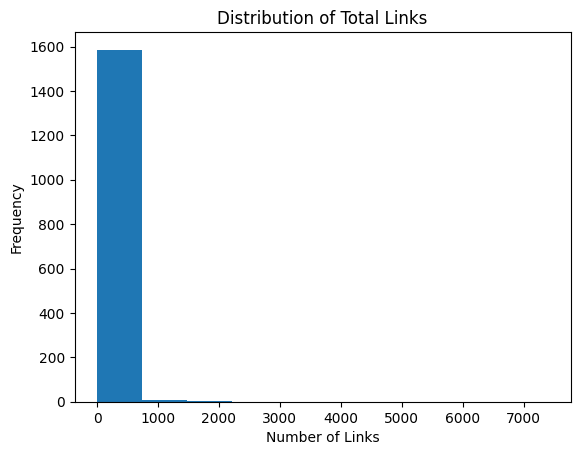

In [7]:
# Histogram of number of links per page
plt.figure()
plt.hist(df['num_links'])
plt.title('Distribution of Total Links')
plt.xlabel('Number of Links')
plt.ylabel('Frequency')
plt.show()

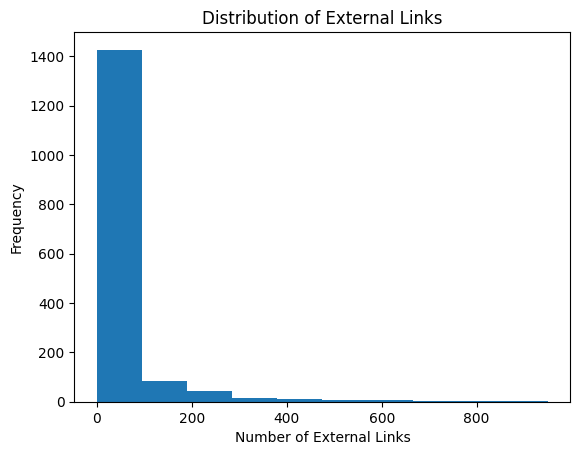

In [8]:
# Histogram of external links per page
plt.figure()
plt.hist(df['num_external_links'])
plt.title('Distribution of External Links')
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')
plt.show()

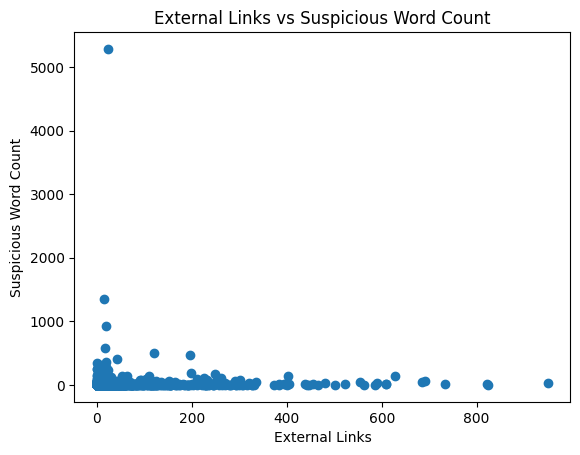

In [9]:
# Scatter: suspicious word count vs external links
plt.figure()
plt.scatter(df['num_external_links'], df['suspicious_word_count'])
plt.title('External Links vs Suspicious Word Count')
plt.xlabel('External Links')
plt.ylabel('Suspicious Word Count')
plt.show()